# EM analysis Experimenting

#### Run this at the beginning of every notebook

In [1]:
%load_ext autoreload
%autoreload 2

#### importing data and reading in CSV 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020202050,20201028,1,0
1,1,1,A,0,805020202050,20201028,1,1
2,2,2,A,0,805020202050,20201028,1,2
3,3,3,B,1,805020202050,20201028,1,3
4,4,4,B,0,805020202050,20201028,1,4
...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175
13289,13289,1,A,0,508020208020,20201107,6,176
13290,13290,2,A,0,508020208020,20201107,6,177
13291,13291,1,A,1,508020208020,20201107,6,178


#### adding a day column using date column. 


In [3]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df
# #find the difference between dates, make a new column in df with the day of the experiment 
# df['day'] = ""
# df["dateChange"] = df['date'].diff()
# #new df for when diff in dates = 1
# len_dateChange = df[(df['dateChange']==1)]
#len_dateChange

#  #(okay does not like ix= 9)
# for ix in range(0,len(len_dateChange)+1):  
#     if ix ==0:
#         day_ix= len_dateChange.iloc[ix, 0]
#         new= df.index < day_ix        
#         df.loc[new, 'day'] = ix+1
#     elif ix < (len(len_dateChange)): 
#         new = (df.index < len_dateChange.iloc[ix,0]) & (df.index>= len_dateChange.iloc[ix-1, 0])# (a bunch of print statements, what is it right before it breaks)
#         df.loc[new, 'day'] = ix+1
#     elif ix >= (len(len_dateChange)):
#         new = (df.index >= len_dateChange.iloc[ix-1,0]) # (a bunch of print statements, what is it right before it breaks)
#         df.loc[new, 'day'] = ix+1
# del df['dateChange']
# df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num
0,0,4,B,1,805020202050,20201028,1,0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1
2,2,2,A,0,805020202050,20201028,1,2,1,1
3,3,3,B,1,805020202050,20201028,1,3,1,1
4,4,4,B,0,805020202050,20201028,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3
13289,13289,1,A,0,508020208020,20201107,6,176,11,3
13290,13290,2,A,0,508020208020,20201107,6,177,11,3
13291,13291,1,A,1,508020208020,20201107,6,178,11,3


In [4]:
#makes new dataframes for the first session of both the first and last day
firstday_firstsesh= df[(df['day'] == 1) & (df['session'] == 1)]
lastday_firstsesh = df[(df['day'] == 11) & (df['session'] == 1)]


## Plotting!

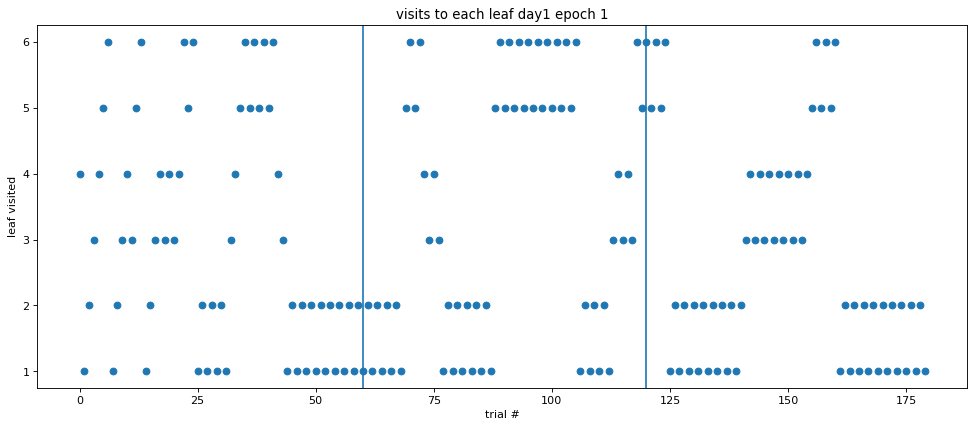

In [5]:
figure(figsize=(15, 6), dpi=80)
plt.scatter(firstday_firstsesh[firstday_firstsesh.columns[0]], firstday_firstsesh[firstday_firstsesh.columns[1]])
plt.title("visits to each leaf day1 epoch 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")
plt.axvline(60, 0, 6, label='end contin')
plt.axvline(120, 0, 6, label='pyplot vertical line')

In [ ]:
#This cell will currently plot every single stem visited during expt
#plt.scatter(df[df.columns[0]], df[df.columns[1]], linewidth=.5, marker = "x" )

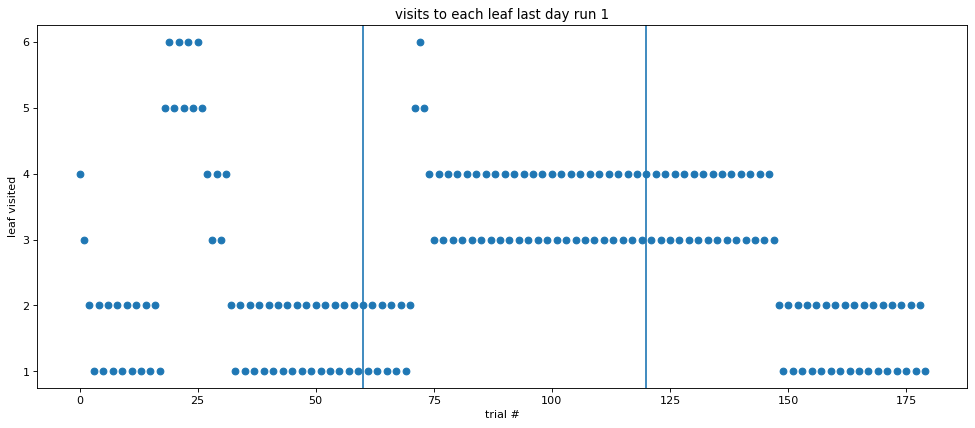

In [6]:
figure(figsize=(15, 6), dpi=80)
plt.scatter(lastday_firstsesh[lastday_firstsesh.columns[7]], lastday_firstsesh[lastday_firstsesh.columns[1]])
plt.title("visits to each leaf last day run 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")
plt.axvline(60, 0, 6, label='end contin')
plt.axvline(120, 0, 6, label='pyplot vertical line')

### Finding how many trials spent at each stem 

In [7]:
num_trials_A = firstday_firstsesh [(firstday_firstsesh['stem'] == 'A')]
num_trials_B = firstday_firstsesh [(firstday_firstsesh['stem'] == 'B')]
num_trials_C = firstday_firstsesh [(firstday_firstsesh['stem'] == 'C')]
A = len(num_trials_A)
B = len(num_trials_B)
C = len(num_trials_C)
print(A + B + C)

180


Text(0, 0.5, 'num visits')

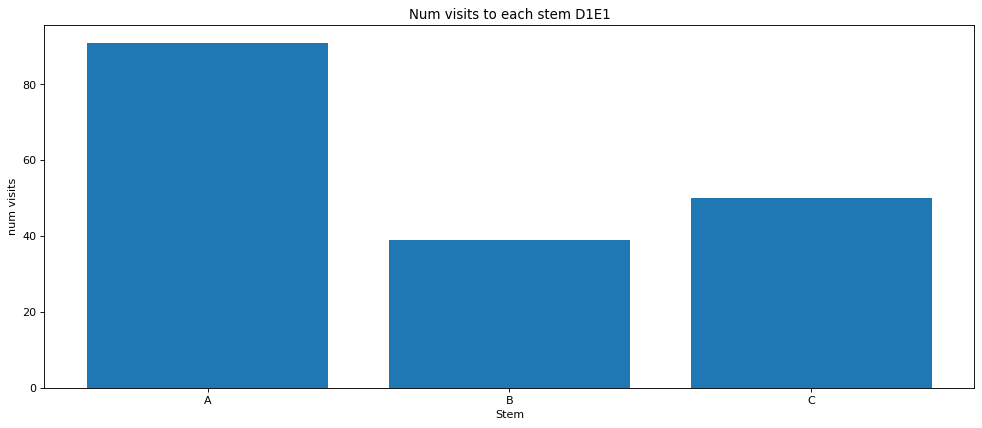

In [8]:
figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
visits = [A, B, C]
plt.bar(stems, visits)
plt.title('Num visits to each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num visits')

### Finding num rewards at each stem

79


Text(0, 0.5, 'num rew')

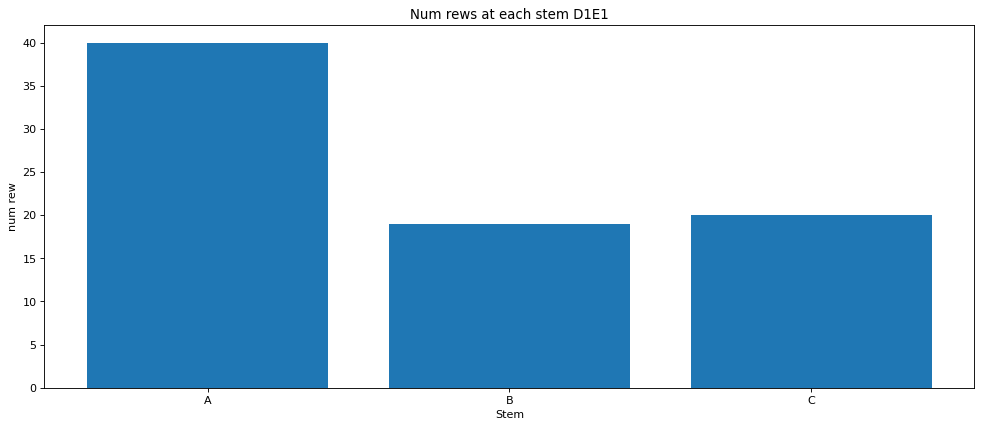

In [9]:
num_rews_A = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'A')]
num_rews_B = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'B')]
num_rews_C = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'C')]
rA = len(num_rews_A)
rB = len(num_rews_B)
rC = len(num_rews_C)
print(rA + rB + rC)

figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
rewards = [rA, rB, rC]
plt.bar(stems, rewards)
plt.title('Num rews at each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num rew')

Text(0, 0.5, 'num rew at that stem')

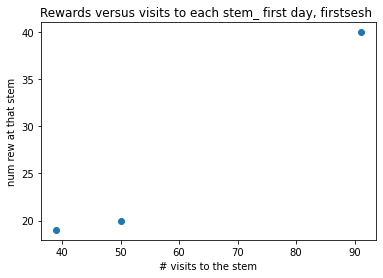

In [10]:
#want to correlate visits with reward at stem 
plt.scatter(visits, rewards)
plt.title('Rewards versus visits to each stem_ first day, firstsesh ')
plt.xlabel('# visits to the stem')
plt.ylabel('num rew at that stem')
#would be nice to make a big version of this for every session. #could also break it up by contingemcy.

## rew rate calculation

### rew rate all (rew) and only first part(rew_smaller) for plot


Text(0, 0.5, 'Avg Rew Rate')

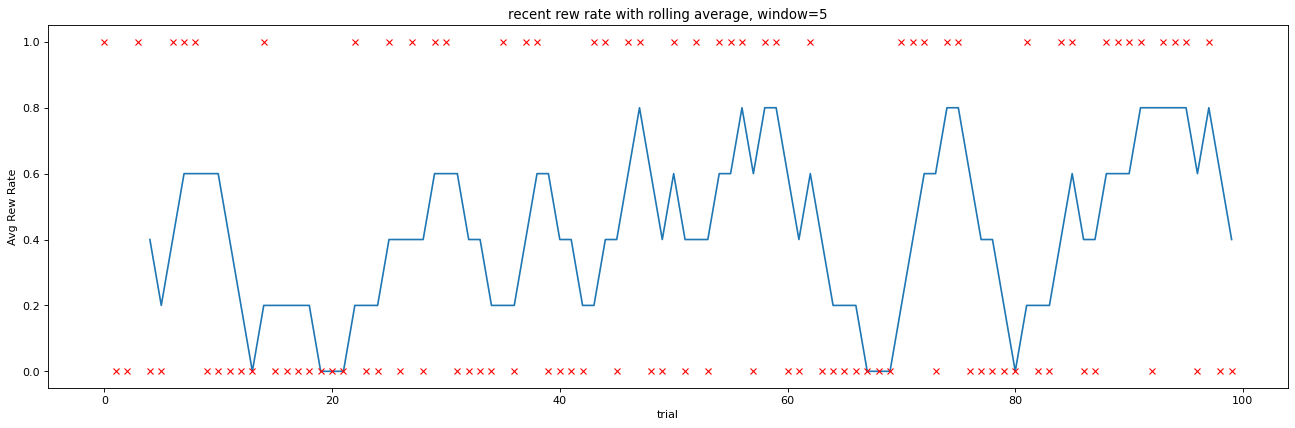

In [11]:
figure(figsize=(20, 6), dpi=80)
rew = firstday_firstsesh.iloc[ :, 3]
rew_smaller = firstday_firstsesh.iloc[ :100, 3]
#rew_all = firstday_firstsesh.iloc[]
rew_rate = rew_smaller.rolling(window=5).mean()
plt.plot(rew_rate, label = 'avg rew rate')
plt.plot(rew_smaller, 'rx', label = 'reward=binary')
plt.title("recent rew rate with rolling average, window=5")
plt.xlabel("trial")
plt.ylabel("Avg Rew Rate")

### Adding column of rew rate to firstday_firstsesh

In [12]:
firstday_firstsesh['Rew_Rate_all'] = ""
rew_rate_all = rew.rolling(window=5).mean()
# type(rew_rate_all)
firstday_firstsesh.loc[:,'Rew_Rate_all'] = rew_rate_all
#firstday_firstsesh['Rew_Rate_all'] = firstday_firstsesh['Rew_Rate_all'].astype(float)
#firstday_firstsesh.plot(x='trial',y='Rew_Rate_all') #the reason i plotted is bc last values on df are 0? 

<ipython-input-12-38b188eac5f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstday_firstsesh['Rew_Rate_all'] = ""
/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### calculate rew rates @ each stem


/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,Rew_Rate_all,rew_rate_A,rew_rate_B,rew_rate_C
0,0,4,B,1,805020202050,20201028,1,0,1,1,NaN,NaN,NaN,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,NaN,NaN,NaN,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1,NaN,NaN,NaN,NaN
3,3,3,B,1,805020202050,20201028,1,3,1,1,NaN,NaN,NaN,NaN
4,4,4,B,0,805020202050,20201028,1,4,1,1,0.4,NaN,0.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,1,A,0,208050802020,20201028,1,175,1,3,0.2,0.000000,NaN,NaN
176,176,2,A,0,208050802020,20201028,1,176,1,3,0.2,0.000000,NaN,NaN
177,177,1,A,0,208050802020,20201028,1,177,1,3,0.0,0.000000,NaN,NaN
178,178,2,A,1,208050802020,20201028,1,178,1,3,0.2,0.333333,NaN,NaN


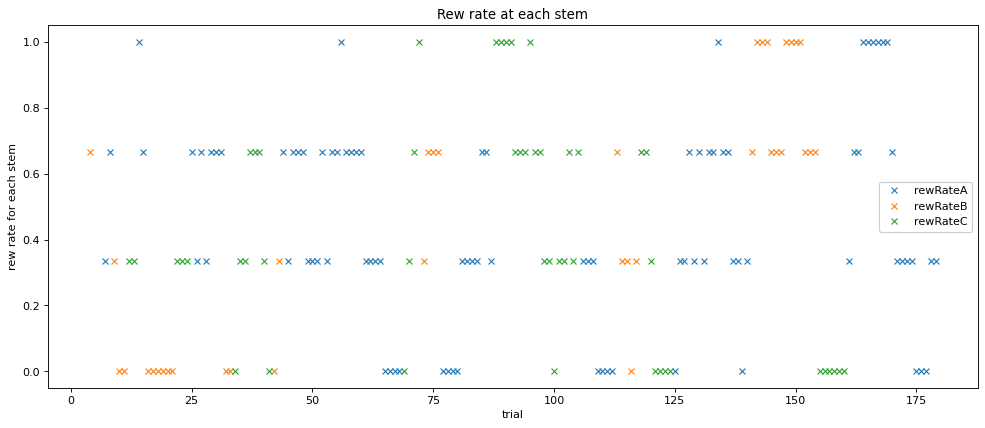

In [13]:
firstday_firstsesh.rew_rate_A = 0 #type = int now. 
firstday_firstsesh.rew_rate_B = 0
firstday_firstsesh.rew_rate_C = 0



rewA = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='A']['reward']
rew_rateA = rewA.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='A', 'rew_rate_A'] = rew_rateA
rewB = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='B']['reward']
rew_rateB = rewB.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='B', 'rew_rate_B'] = rew_rateB
rewC = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='C']['reward']
rew_rateC = rewC.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='C', 'rew_rate_C'] = rew_rateC

figure(figsize=(15, 6), dpi=80)
#Plotting each of these overlayed which looks awful i know, thinking about a more relevent way to visualize 
plt.plot(rew_rateA, 'x', label = "rewRateA")
plt.plot(rew_rateB, 'x', label = "rewRateB")
plt.plot(rew_rateC, 'x', label = "rewRateC")


plt.title('Rew rate at each stem')
plt.xlabel('trial')
plt.ylabel('rew rate for each stem')
plt.legend(framealpha=1, frameon=True)

firstday_firstsesh

## Splitting up contingenices, finding most rewarded

In [14]:
c1 = firstday_firstsesh[(firstday_firstsesh['cont_num'] == 1)]
c2 = firstday_firstsesh[(firstday_firstsesh['cont_num'] == 2)]
c3 = firstday_firstsesh[(firstday_firstsesh['cont_num'] == 3)]

#finding number of rewards at each leaf

rew1 = len(c1.loc[(c1['leaf'] == 1) & c1['reward'] == 1])
rew2 = len(c1.loc[(c1['leaf'] == 2) & c1['reward'] == 1])
rew3 = len(c1.loc[(c1['leaf'] == 3) & c1['reward'] == 1])
rew4 = len(c1.loc[(c1['leaf'] == 4) & c1['reward'] == 1])
rew5 = len(c1.loc[(c1['leaf'] == 5) & c1['reward'] == 1])
rew6 = len(c1.loc[(c1['leaf'] == 6) & c1['reward'] == 1])



#printing this out nicely
print("the number of rewards at leaf 1 in c1 is %d"  % rew1)
print("the number of rewards at leaf 2 is %d"  % rew2)
print("the number of rewards at leaf 3 is %d"  % rew3)
print("the number of rewards at leaf 4 is %d"  % rew4)
print("the number of rewards at leaf 5 is %d"  % rew5)
print("the number of rewards at leaf 6 is %d"  % rew6)

the number of rewards at leaf 1 in c1 is 12
the number of rewards at leaf 2 is 5
the number of rewards at leaf 3 is 2
the number of rewards at leaf 4 is 1
the number of rewards at leaf 5 is 1
the number of rewards at leaf 6 is 4


### splitting up the contingency from the df into leaf probs

In [15]:
c1_int = firstday_firstsesh.contingency[1]
l1_probs = int(str(c1_int)[:2])
l2_probs = int(str(c1_int)[2:4])
l3_probs = int(str(c1_int)[4:6])
l4_probs = int(str(c1_int)[6:8])
l5_probs = int(str(c1_int)[8:10])
l6_probs = int(str(c1_int)[10:12])

all_probs = (l1_probs, l2_probs, l3_probs, l4_probs, l5_probs, l6_probs)

print(all_probs)

(80, 50, 20, 20, 20, 50)


In [16]:
visits_1_c1 = len(c1.loc[(c1['leaf'] == 1)])
visits_2_c1 = len(c1.loc[(c1['leaf'] == 2)])
visits_3_c1 = len(c1.loc[(c1['leaf'] == 3)])
visits_4_c1 = len(c1.loc[(c1['leaf'] == 4)])
visits_5_c1 = len(c1.loc[(c1['leaf'] == 5)])
visits_6_c1 = len(c1.loc[(c1['leaf'] == 6)])

all_visits= (visits_1_c1, visits_2_c1, visits_3_c1, visits_4_c1, visits_5_c1, visits_6_c1)

all_visits


(15, 14, 8, 8, 7, 8)

In [17]:
#how does the recent reward rate (predict, relate to) the number of recent visits to each stem? 
#what i wanted to do was compare the number of rewards to the number of visits at each stem, need to keep the pairs but also want to sort them? 

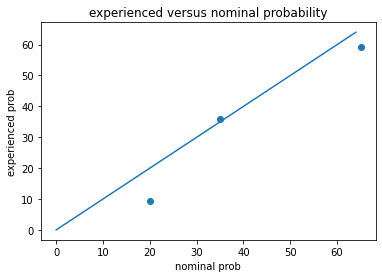

In [18]:
## ooh might be interestnig to look at experienced versus nominal rew probs!
all_stem_probs= [statistics.mean(all_probs[0:2]),statistics.mean(all_probs[2:4]),statistics.mean(all_probs[4:6])]
# mean_rew_a_c1=c1.loc['rew_rate_A'].mean()
rew_rate_A_mean = c1['rew_rate_A'].mean()
rew_rate_B_mean = c1['rew_rate_B'].mean()
rew_rate_C_mean = c1['rew_rate_C'].mean()
all_exp_probs = [rew_rate_A_mean*100,rew_rate_B_mean*100,rew_rate_C_mean*100]
all_exp_probs
plt.scatter(all_stem_probs, all_exp_probs)
plt.title('experienced versus nominal probability')
plt.xlabel('nominal prob')
plt.ylabel('experienced prob') #
x=range(0,max(all_stem_probs))
y=range(0,max(all_stem_probs))
plt.plot(x,y)

Text(0, 0.5, 'number of visits')

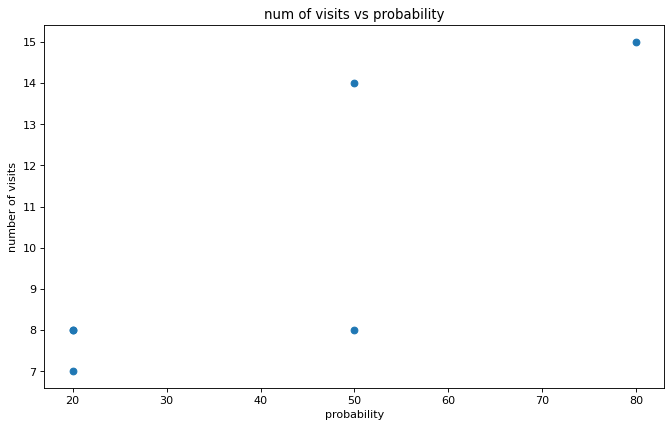

In [19]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(all_probs, all_visits) #actually didnt need to sort, it was just weird looking but makes sense.
plt.title('num of visits vs probability')
plt.xlabel('probability')
plt.ylabel('number of visits') #maybe color coding dots per stem would be helpful? 


Text(0, 0.5, '# visits')

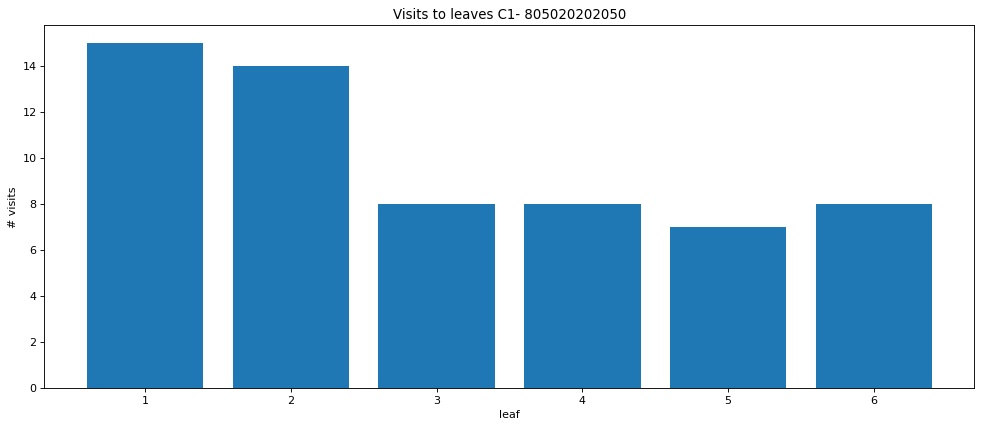

In [20]:
figure(figsize=(15, 6), dpi=80)


leaves = [1,2,3,4,5,6]
plt.bar(leaves, all_visits)
plt.title('Visits to leaves C1- %d' % c1_int) 
plt.xlabel('leaf')
plt.ylabel('# visits')

In [21]:
#now i should find the proprtion of time he spends at each stem for some parameter 
#set proportions worth of time. 

#So ill need to 
#get 1st ___ of visits to A, B, and C 
#hard code: number of trials in contingency 
#parameter to play with- number of trials in window

# proportion = number of visits @ stem/ number of visits in window? 

#so will have to find number of trials in window that i want to play with, 

num_trials_in_conting = 60 
group_size = 10
num_iter = int(num_trials_in_conting / group_size)

#first break up c1 into groups of size of window size 
lst = (np.array_split(c1, num_iter))

#for ix in range(len((lst)))
window1 = lst[0]

lstAll = []

for ix in range(num_iter):
    window = lst[ix]
    for stem in ['A', 'B', 'C']:
        prop = sum(window['stem'] == stem)/ (group_size)
        lstAll.append(prop)
        print(prop)
        
lstA=lstAll[0::3]
lstB=lstAll[1::3]
lstC=lstAll[2::3]
    
lstA



0.4
0.4
0.2
0.2
0.6
0.2
0.5
0.2
0.3
0.2
0.2
0.6
0.6
0.2
0.2
1.0
0.0
0.0


[0.4, 0.2, 0.5, 0.2, 0.6, 1.0]

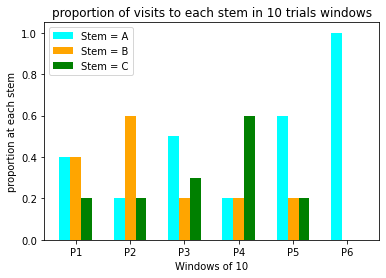

In [22]:
x = np.arange(6)
y1 = lstA
y2 = lstB
y3 = lstC
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']) 
#                'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14'])
plt.xlabel("Windows of 10")
plt.ylabel("proportion at each stem")
plt.legend(["Stem = A", "Stem = B", "Stem = C"])
plt.title('proportion of visits to each stem in 10 trials windows')
plt.show()

In [23]:
# Now I'd like to do the same thing for C2 to compare how his visits change 

In [24]:

num_trials_in_conting = 60 
group_size = 10
num_iter = int(num_trials_in_conting / group_size)

lst2 = (np.array_split(c2, num_iter))

lstAll2 = []

for ix in range(num_iter):
    window = lst2[ix]
    for stem in ['A', 'B', 'C']:
        prop = sum(window['stem'] == stem)/ (group_size)
        lstAll2.append(prop)
        print(prop)
        
lstA2=lstAll2[0::3]
lstB2=lstAll2[1::3]
lstC2=lstAll2[2::3]
    
# # lstA2
# lst2
# #lstAll2

0.9
0.0
0.1
0.3
0.4
0.3
0.8
0.0
0.2
0.0
0.0
1.0
0.4
0.0
0.6
0.3
0.5
0.2


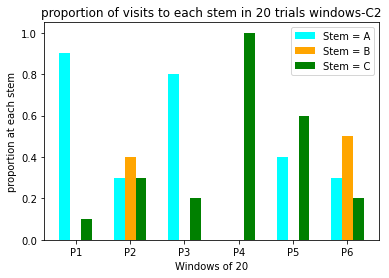

In [25]:
x = np.arange(6)
y1 = lstA2
y2 = lstB2
y3 = lstC2
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']) #'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P17', 'P18'])
plt.xlabel("Windows of 20")
plt.ylabel("proportion at each stem")
plt.legend(["Stem = A", "Stem = B", "Stem = C"])
plt.title('proportion of visits to each stem in 20 trials windows-C2')
plt.show()
#, 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14'

In [26]:
#This is just to show that there was not an error with the last plot, and that the rat spent the most time at B for sure. 

visits_1_c2 = len(c2.loc[(c2['leaf'] == 1)])
visits_2_c2 = len(c2.loc[(c2['leaf'] == 2)])
visits_3_c2 = len(c2.loc[(c2['leaf'] == 3)])
visits_4_c2 = len(c2.loc[(c2['leaf'] == 4)])
visits_5_c2 = len(c2.loc[(c2['leaf'] == 5)])
visits_6_c2 = len(c2.loc[(c2['leaf'] == 6)])

all_visits= (visits_1_c2, visits_2_c2, visits_3_c2, visits_4_c2, visits_5_c2, visits_6_c2)

all_visits 



(15, 12, 5, 4, 12, 12)

In [27]:
# So now i'd loike to look at exploration strategy. 
# The idea is that over time, the rat may learn to find which is the best stem.
#So in the first conting., he may spend more time(trials) at all three stems. A-B-C-A-B-C for much longer.(no biases) 
# But maybe by, c10, lets say, He may only go A-B-C, determine that B is the best, 
#and then stay there much sooner. 
#another thing to consider here is the number of visits to the leaves within a bout a stem visit. 
#This probably also changes with exploration strategy. 

# I dont want to set an arbitrary cutoff for when exploration steop and exploitation starts. 
# I basically want to find the point when the animal spends the most time at whichever stem he spends 
# the most time at for that contingency (not necessarily the best). 


# I think I good to start with this would not be the first contingency of the first day. 
#SO where I will start off will be on... day 8 completely random. Session 2- so had some 
#experience that day but still motivated.


d8_s2_c1 =  df[(df['day'] == 8) & (df['session'] == 2) & (df['cont_num'] ==1)]

#hmmm okay so i plotted first only the first contingency and he spent the most time at C, even though 
#A was technically better. so i figured I would find an example where he spent the most time at the 
#best, tried plotting c2 of the same session and WOW he spent the entire time at B. not interesting and also 
#not the best stem! what the heck chimi? 
#Ill try day 5 out of curiousity and also randomness?
# d8_s2_c1_contingency= day8_epoch2[(day8_epoch2['trial'] == 1)]['contingency']
# d8_s2_c1_contingency
# d5_s1_c1_contingency.iloc[0]

Text(0, 0.5, 'leaf visited')

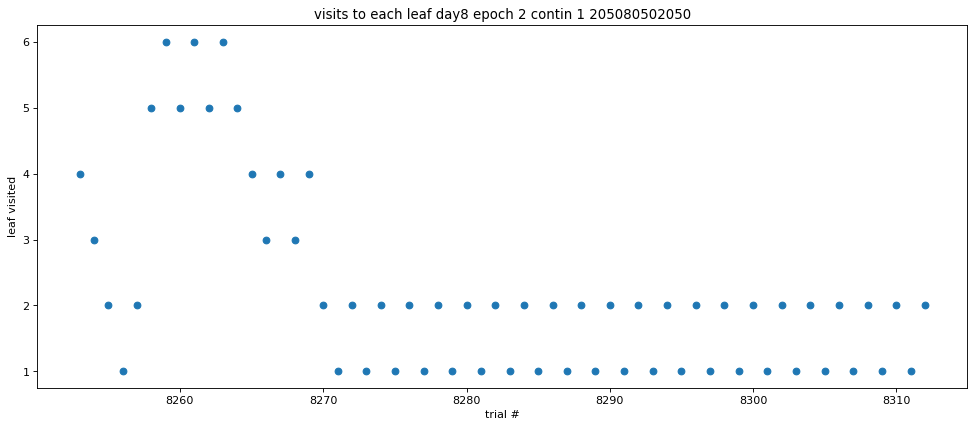

In [28]:
#day8_epoch2
# d8_s2_c1 = day8_epoch2[(day8_epoch2['contingency'] == d8_s2_c1_contingency.iloc[0])]
d8_s2_c1
figure(figsize=(15, 6), dpi=80)
plt.scatter(d8_s2_c1[d8_s2_c1.columns[0]], d8_s2_c1[d8_s2_c1.columns[1]])
plt.title("visits to each leaf day8 epoch 2 contin 1 205080502050")
plt.xlabel("trial #")
plt.ylabel("leaf visited")

Text(0, 0.5, 'leaf visited')

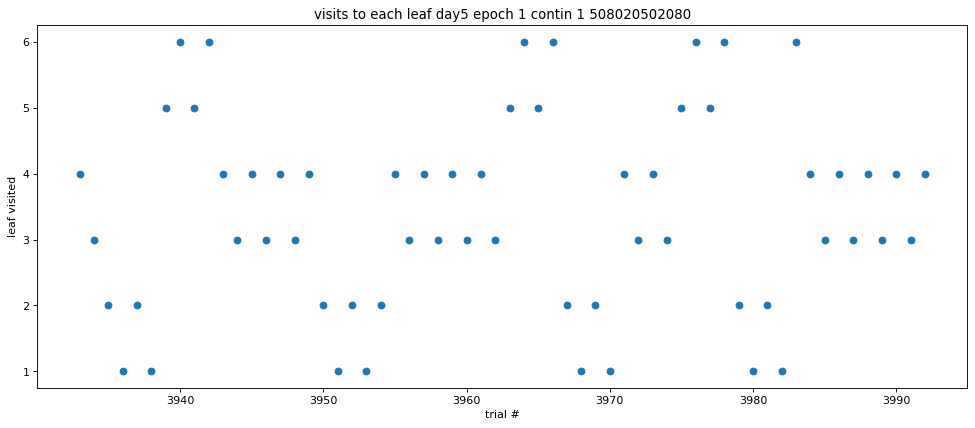

In [29]:
#So now I have made a prediction that first ~20 trials are exploration. Lets confirm with another day. 
d5_s1_c1 = df[(df['day'] == 5) & (df['session'] == 1) & (df['cont_num'] == 1)]
# day5_epoch1
# d5_s1_c1_contingency = day5_epoch1[(day5_epoch1['trial'] == 1)]['contingency']
# d5_s1_c1_contingency
# d5_s1_c1 = day5_epoch1[(day5_epoch1['contingency'] == d5_s1_c1_contingency.iloc[0])]
d5_s1_c1

figure(figsize=(15, 6), dpi=80)
plt.scatter(d5_s1_c1[d5_s1_c1.columns[0]], d5_s1_c1[d5_s1_c1.columns[1]])
plt.title("visits to each leaf day5 epoch 1 contin 1 508020502080")
plt.xlabel("trial #")
plt.ylabel("leaf visited")


Text(0, 0.5, 'leaf visited')

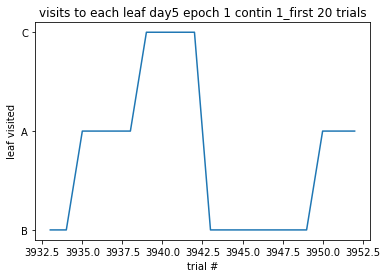

In [30]:
# hmmm interesting. I can see why "noise" is an issue here. his behavior depends on the contingencies as well. 

#could split it up by contingency type. 
# eg how does he explore every time there is an 8050 and an 8020? 

#Sooooo lets just call our trials of interest the first 20 trials. 
#Id like to know which stems he visits in order in the first 20 trials. 

#lets start with day5, session1, conting 1. 

d5_s1_c1_1st20 = d5_s1_c1[(d5_s1_c1['trial'] <20)]['stem']
#type(d5_s1_c1_1st20)
plt.plot(d5_s1_c1_1st20)
plt.title("visits to each leaf day5 epoch 1 contin 1_first 20 trials")
plt.xlabel("trial #")
plt.ylabel("leaf visited")



In [ ]:
#Okay so after this work and a little thinking, I decided it would be easier to just start
#out by looking at the order of the first 3 stems the guy visits and see if theres a pattern. 
#The options: ABC, BCA, CAB, BAC, CBA, ACB, and then the option that he goes back to the first stem for
#the third choice. Oy lots of choices. 

#Will only look at the first contginecy of each session. 

#In the end, I think I want a bar plot of number of times he did each choice. 

#So, second to last, I want to end up with 2 lists. One will contain the choices listed above for stem order. 
#The second will be the number of times each choice was done. 

#If the data starts with 202002
#for every day, for every session, ugh for every contingency which is not easy to check as it is right now, fixing that first.
#Date = 20200213

#okay ugh maybe i dont need to know contingency because I will only look at first 3 visits of every unique session



#Date = 20200213

#Largest= date
#then session 
#then stem. 
#Will say to look at first row and find stem. stemm = that.  Then keep going until stem != that. stem2 is now
#equal to new stem. then keep going until stem equals something new. thats stem3. Then log that somehow? 
#likely a bunch of if statements...

#session = 1

#stem1= df[(df['date'] == Date) & (df['session'] == session) & (df['trial'] == 0)]['stem']


    
#possible irrelevant? 

#opperationalizing variables


In [31]:
#Niiiiiice this just checks if the stem has changes and adds true or false to df.
df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
df["sessionChange"] = df['session'].diff()
df["dateChange"] = df['date'].diff()
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,stemChange,sessionChange,dateChange
0,0,4,B,1,805020202050,20201028,1,0,1,1,0,NaN,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,0.0,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,0,0.0,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,0.0,0.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,0,0.0,0.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,0,0.0,0.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,0,0.0,0.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,0,0.0,0.0


Text(0, 0.5, 'num times start session at stem')

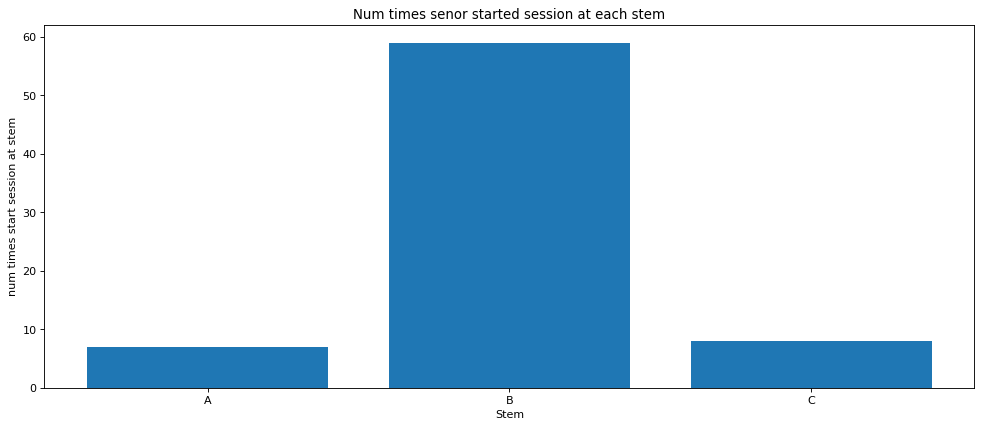

In [32]:
#First lets use the new columns to find the first stem of every session. 
session_check = df[(df['sessionChange'] != 0) | (df['dateChange'] != 0)]
session_check
first_trials= df[(df['trial'] == 0)]['stem']
#type(first_trials)
first_A = (first_trials.where(first_trials == 'A'))
first_B =(first_trials.where(first_trials == 'B'))
first_C =(first_trials.where(first_trials == 'C'))
first_A=first_A.count()
first_B=first_B.count()
first_C=first_C.count()
#print(first_A, first_B, first_C)

figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
start = [first_A, first_B, first_C]
plt.bar(stems, start)
plt.title('Num times senor started session at each stem')
plt.xlabel('Stem')
plt.ylabel('num times start session at stem')


In [33]:
# I need to use the indexes of session check, which tell me the first time theres a new session
#Split the data up- between the two indexes of session check, find the times when stem change is true,
#find the first two stems. 

#first, find df when index = first index of session_check
#oooooh this looks like an opportunity to use .ne,.shift,.cumsum! 
#maybe not quite....





for ix in range(len(session_check)):
    trial0_ix= session_check.iloc[ix, 0]
    trial0_df = df.iloc[trial0_ix]
    stem1=trial0_df.loc['stem']
    trial0_ix_next= session_check.iloc[(ix+1), 0]
    trial0_ix_next
    if ix ==0:
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
    else: 
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
        current_df = current_df.where(current_df.iloc[:,0] > trial0_ix)
    current_df
    stem_order_df = current_df[(current_df['stemChange'] == 1.0)]['stem']
    stem_order_df
    ser_first2= stem_order_df.head(2)
    stem2=ser_first2.head(1)
    #stem2
    stem3 = ser_first2[-1:]
    #stem3
    if ix == 0:
        stems = []
    stems.append(stem1)
    stem2=stem2.tolist()
    stem3=stem3.tolist()
    stems.append(stem2)
    stems.append(stem3)
stems
# will throw error because cant handle # 51 with the qay ive written it. 

IndexError: single positional indexer is out-of-bounds

In [34]:
#If the trial is 0, stem 1= that stem. 
#stem 2 is the next true. stem 3 is the next true. 

#firstday_firstsesh.loc["stemChange"] = firstday_firstsesh["stem"].shift(1, fill_value=firstday_firstsesh["stem"].head(1)) != firstday_firstsesh["stem"]
#firstday_firstsesh

# first_month = df[(df['date'] <= 20200229)]
# Date = 20200213
# Session = 1

# for Date, Session in range(len(first_month)): 
#     working = first_month[(first_month['date'] == Date) & (first_month['session'] = Session)]['stem']
#     Date = Date +1
#     Session = Session+1
    
# for session in range(1:3):
final = [stems[i * 3:(i + 1) * 3] for i in range((len(stems) + 3 - 1) // 3 )] 
print (type(final))

ACB=0
ABC=0
CBA=0
CAB=0
BAC=0
BCA=0
CAC=0
BAB=0
CBC=0
BCB=0
ABA=0
ACA=0



for list_ix in range(len(final)):
    if final[list_ix] == ['A', ['C'], ['B']]:
        ACB = ACB + 1 
    elif final[list_ix] == ['A', ['B'], ['C']]:
        ABC = ABC + 1 
    elif final[list_ix] == ['C', ['B'], ['A']]:
        CBA = CBA + 1 
    elif final[list_ix] == ['C', ['A'], ['B']]:
        CAB = CAB + 1  
    elif final[list_ix] == ['B', ['A'], ['C']]:
        BAC = BAC + 1  
    elif final[list_ix] == ['B', ['C'], ['A']]:
         BCA = BCA + 1
    elif final[list_ix] == ['C', ['A'], ['C']]:
        CAC = CAC + 1      
    elif final[list_ix] == ['B', ['A'], ['B']]:
        BAB = BAB + 1
    elif final[list_ix] == ['C', ['B'], ['C']]:
        CBC = CBC + 1
    elif final[list_ix] == ['B', ['C'], ['B']]:
        BCB = BCB + 1      
    elif final[list_ix] == ['A', ['B'], ['A']]:
        ABA = ABA + 1
    elif final[list_ix] == ['A', ['C'], ['A']]:
        ACA = ACA+1

list_of_3s = (ACB,ABC,CBA,CAB,BAC,BCA,CAC,BAB,CBC,BCB,ABA,ACA)
list_of_3s

<class 'list'>


(5, 2, 3, 5, 49, 7, 0, 2, 0, 0, 0, 0)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

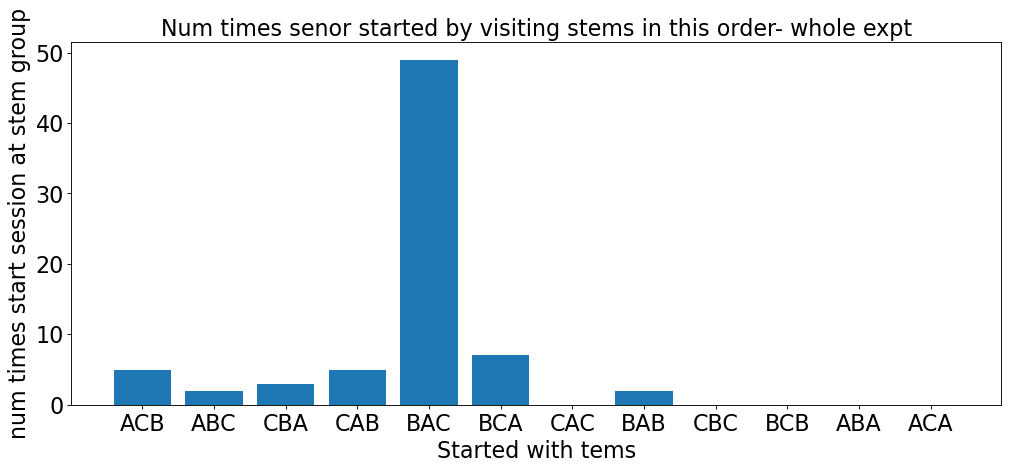

In [39]:
figure(figsize=(15, 6), dpi=80)
stems = ['ACB','ABC','CBA','CAB','BAC','BCA','CAC','BAB','CBC','BCB','ABA','ACA']
plt.bar(stems, list_of_3s)
plt.title('Num times senor started by visiting stems in this order- whole expt', fontsize = 20)
plt.xlabel('Started with tems',fontsize = 20)
plt.ylabel('num times start session at stem group',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [ ]:
#could look at how this pattern develops

In [82]:
obj = ['day', 'session', 'stem']
df['rew_rate'] = df.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=10).mean())
df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
df.loc[(df['trial']==0),'rolling_avg_A'] = 0
df.loc[(df['trial']==0),'rolling_avg_B'] = 0
df.loc[(df['trial']==0),'rolling_avg_C'] = 0

df.loc[:,cols] = df.loc[:,cols].ffill()

equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
df
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem2'] = 'A'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem2'] = 'B'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem2'] = 'C'

replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem'] = 'A'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem'] = 'B'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem'] = 'C'

df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')
df['best_all'] = df['at_best'] +df['at_best2']
# del df['at_best']
# del df['at_best2']
Not_at_Best = df[df['best_all']=='00']
at_best = df[df['best_all']=='01'] 
at_best2 = df[df['best_all']=='10']

df.loc[(df['best_all'] =='01'),'best_all']= 1
df.loc[(df['best_all'] =='10'),'best_all']= 1
df.loc[(df['best_all'] =='00'),'best_all']= 0

del df['at_best']
del df['at_best2']



In [83]:
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum()

df['new_cont']


0          1
1          1
2          1
3          1
4          1
        ... 
13288    222
13289    222
13290    222
13291    222
13292    222
Name: new_cont, Length: 13293, dtype: int64

In [135]:
df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
#     num_a = (df[df['new_cont'] ==cont]['chose_a']).sum()
#     num_b = (df[df['new_cont'] ==cont]['chose_b']).sum()
#     num_c = (df[df['new_cont'] ==cont]['chose_c']).sum()
#     best_exp_stem = df[df['new_cont'] ==cont]['best_exp_stem'].unique()
    prop_at_best = (df[df['new_cont']==cont]['best_all'].sum())/60
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont]['stem_switch'].sum())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())

In [123]:
df_choice

,prop_at_best,cont_num,day,session,contingency,stem_switch,num_rew,day_chng
1,0.483333,1.0,1.0,1.0,8.050202e+11,15.0,25.0,True
2,0.516667,2.0,1.0,1.0,2.020502e+11,7.0,24.0,False
3,0.416667,3.0,1.0,1.0,2.080508e+11,4.0,30.0,False
4,0.450000,1.0,1.0,2.0,5.020208e+11,16.0,27.0,False
5,0.566667,2.0,1.0,2.0,5.050502e+11,7.0,22.0,False
...,...,...,...,...,...,...,...,...
218,0.950000,2.0,11.0,5.0,2.020208e+11,1.0,40.0,False
219,0.683333,3.0,11.0,5.0,5.050202e+11,3.0,23.0,False
220,0.850000,1.0,11.0,6.0,2.020205e+11,3.0,37.0,False
221,0.966667,2.0,11.0,6.0,5.020805e+11,1.0,34.0,False


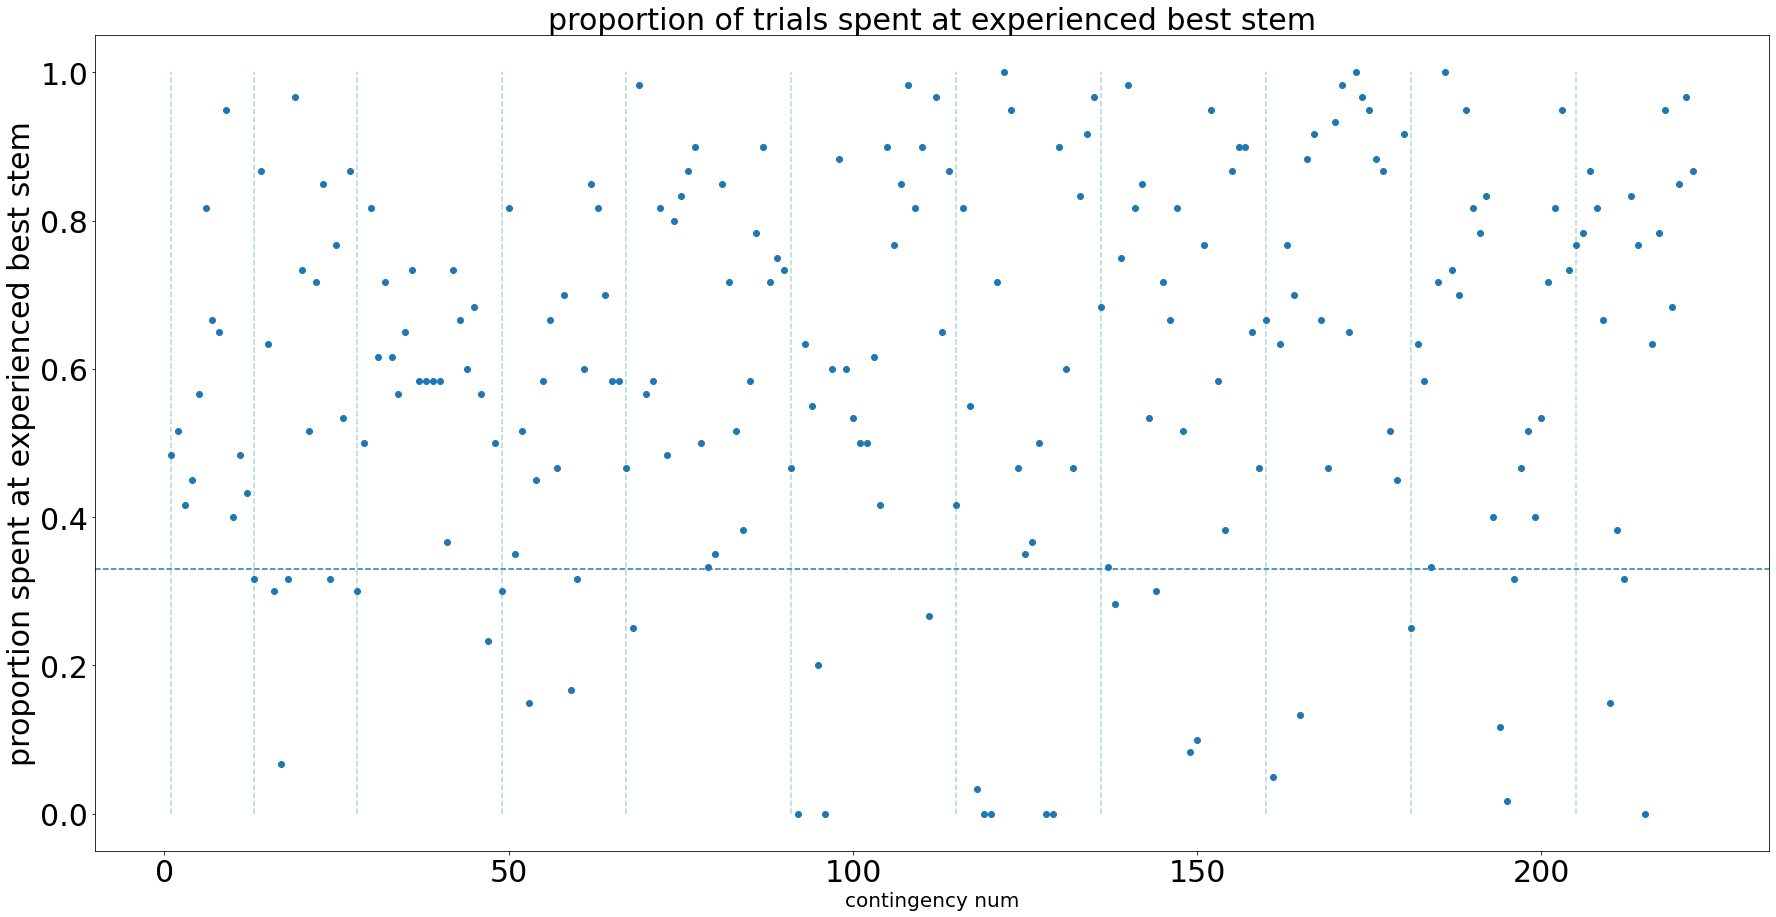

In [86]:


plt.figure(figsize=(30,15))
plt.scatter(df_choice.index,df_choice['prop_at_best'])
plt.title('proportion of trials spent at experienced best stem',fontsize=30)
plt.xlabel("contingency num",fontsize=20)
plt.ylabel('proportion spent at experienced best stem',fontsize=30)
plt.axhline(.33,ls='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.vlines(df_choice[df_choice['day_chng']].index,0,1,colors='teal', ls='--',alpha=0.3)

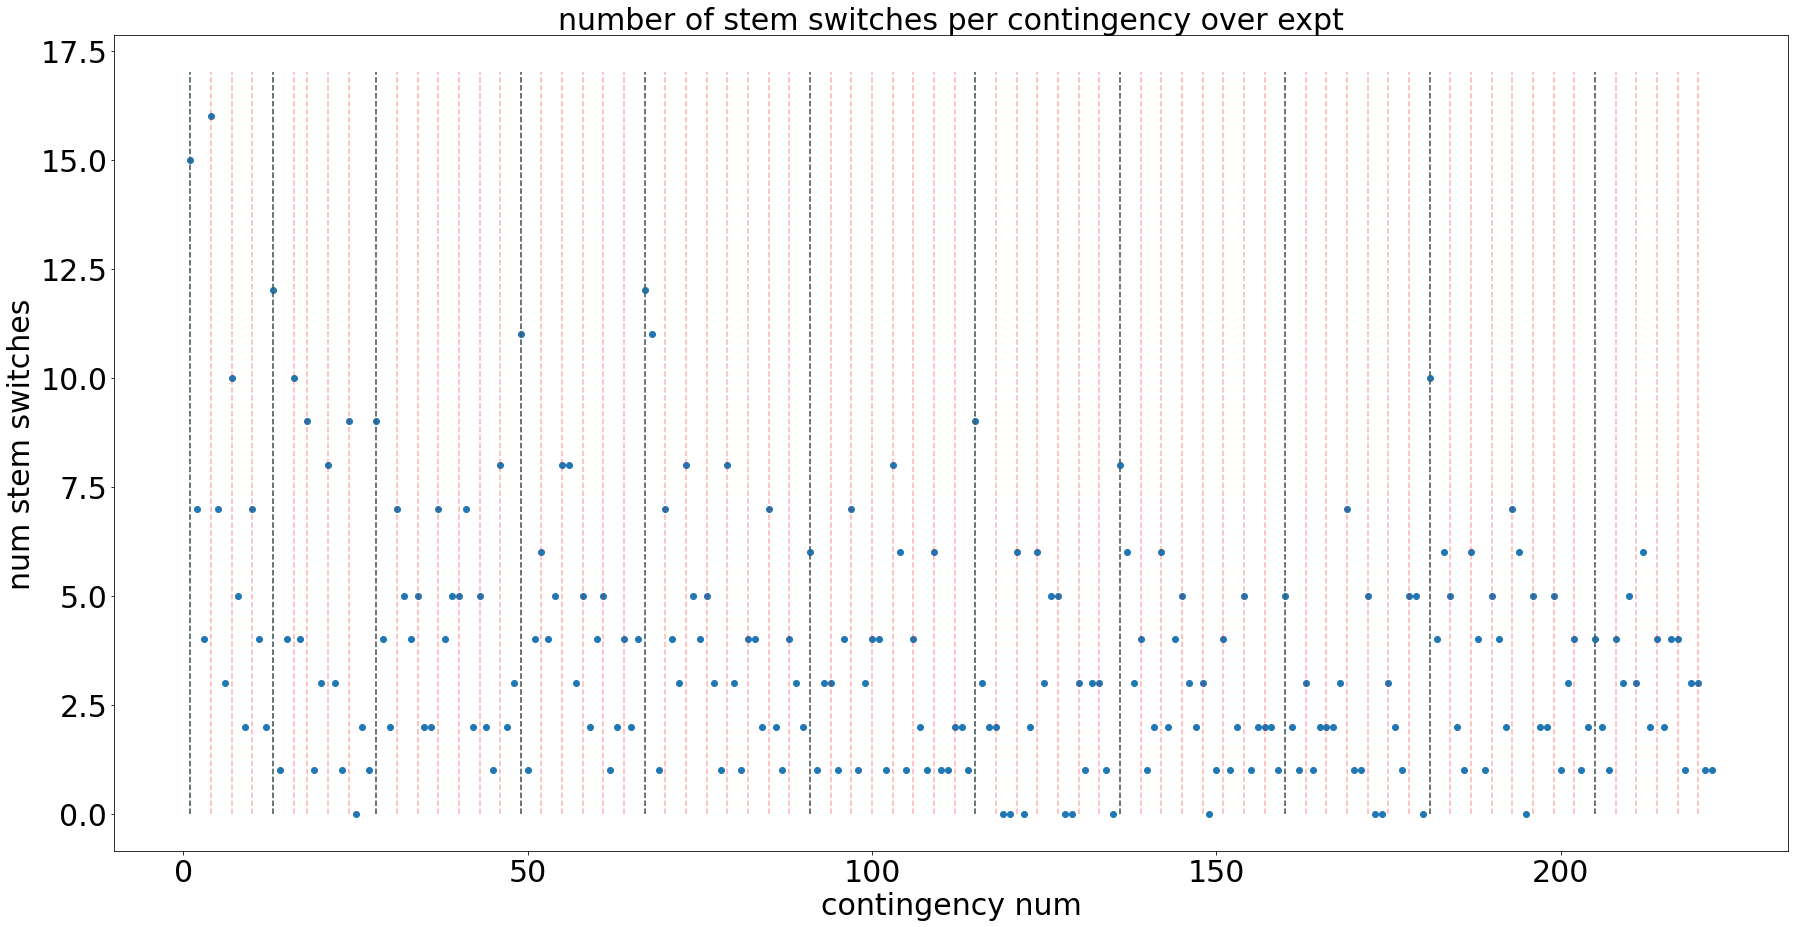

In [140]:


plt.figure(figsize=(30,15))
plt.scatter(df_choice.index,df_choice['stem_switch'])
plt.title('number of stem switches per contingency over expt',fontsize=30)
plt.xlabel("contingency num",fontsize=30)
plt.ylabel('num stem switches',fontsize=30)
#plt.axhline(.33,ls='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.vlines(df_choice[df_choice['day_chng']].index,0,17,colors='teal', ls='--')
plt.vlines(df_choice[df_choice['session_chng']].index,0,17,colors='red', ls='--',alpha=0.3)

Text(0.5, 0, 'contingency #')

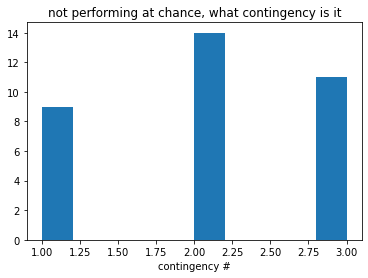

In [87]:
not_at_best = df_choice[df_choice['prop_at_best']<=.33]
# plt.scatter(not_at_best.index, not_at_best['num_rew'])
# plt.title('when not at best for 33% of cont, how many rew did he get')
plt.hist(not_at_best['cont_num'])
plt.title('not performing at chance, what contingency is it')
plt.xlabel('contingency #')

Text(0.5, 0, 'contingency #')

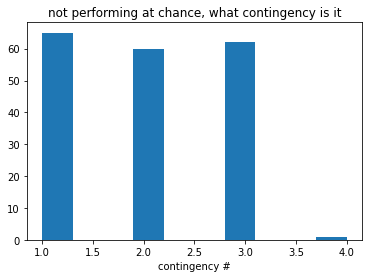

In [141]:
at_best = df_choice[df_choice['prop_at_best']>=.33]
# plt.scatter(not_at_best.index, not_at_best['num_rew'])
# plt.title('when not at best for 33% of cont, how many rew did he get')
plt.hist(at_best['cont_num'])
plt.title('not performing at chance, what contingency is it')
plt.xlabel('contingency #')

In [ ]:
# from conversatino with Alison: 

#What im working on now is good, we dont know this information. 
# Better way to do it is to take differences among date and session like I did with stem change. Then should be able to add or subtract those (in case theres a day with only 1 session)
#But, should go back to original question 
#does it matter what order the rat goes in to start? Or is it just that he goes to each of them a certain number of time? 
#defining exploration vs exploitation in some way? 
#go back to the larger question and ask how does what Im asking now help me answer the bigger question>? does it really tell me what I need to know to answer the bigger question? 
#thinking about it in terms of biases is interesting too (at first he has no bias, spends equal amount of time at all of them)
#figure out the question im trying to ask and pseudocode it, talk with alison before trying it out 
#just for notes we also talked about when to start separat


In [ ]:
#want to write session_check to csv so I have better intuition looking through it. 
# current_df.to_csv(r'/home/emonroe/Documents/current_df.csv', index = False)

In [40]:
# what id like to do now is see how many rewards the guy gets in every contingency of every run. 
# i predict that he will get more as he gets better at the task. Then i can investigate what strategies lead to higher rew

# counting rewards in 

for ix in range(len(session_check)):
    trial0_ix= session_check.iloc[ix, 0]
    trial0_ix
    trial0_df = df.iloc[trial0_ix]
    trial0_df
    stem1=trial0_df.loc['stem']
    trial0_ix_next= session_check.iloc[(ix+1), 0]
    trial0_ix_next
#     trial0_ix_next
    if ix ==0:
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
    else: 
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
        current_df = current_df.where(current_df.iloc[:,0] > trial0_ix)
    current_df
    rewards = (current_df['reward'])
    rewards = rewards.dropna()
    rewards = rewards.sum()
    rewards
    if ix == 0:
         track_rewards = []
    track_rewards.append(rewards)
    
track_rewards

IndexError: single positional indexer is out-of-bounds

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

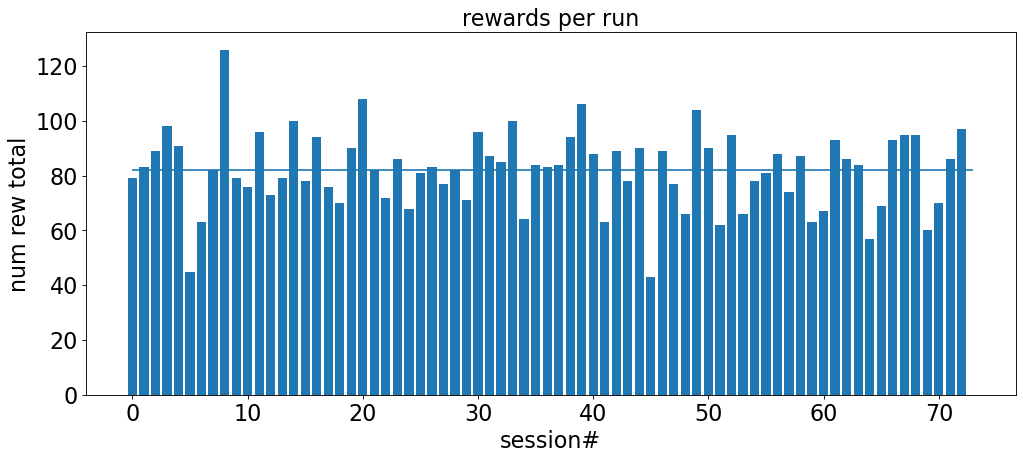

In [42]:
#length of every unique num in pandas df
figure(figsize=(15, 6), dpi=80)
sessions= range(len(track_rewards))
plt.bar(sessions, track_rewards)
plt.title('rewards per run', fontsize=20)
plt.xlabel('session#',fontsize=20)
plt.ylabel('num rew total',fontsize=20)
plt.hlines(statistics.mean(track_rewards), 0, (len(track_rewards)))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



In [ ]:
# I would like to replicate Alisons plots. But instead of looking at it on a daily basis 
 #which i find to be too overwhleming and not helpful in understanding how he finds the best,
# id like to see it on a session by session basis. 
# first, id like to plot just rewarded vs unrewarded trials.. 

In [169]:
#Id like to only look at the contgencies that are the same, to compare accross learning. 


#this cell makes a new list of strings of contingencies(easiest way), split into groups of 2 numbers (the individual rew probabilities for each leaf) 
#throws an error bc of indexing but still mostly works. 
cont_split = []#Options:

for ix in range(len(df)):
    cont = (str((df.contingency.unique())[ix]))
    cont_split.append([cont[i:i+2] for i in range(0, len(cont), 2)])


IndexError: index 127 is out of bounds for axis 0 with size 127

In [138]:
# this turns the strings into ints so theyre easier to compute on. 


cont_split_new=[]
for ix in range(1, len(cont_split)):
    cont_split_new.append([int(i) for i in cont_split[ix]])
cont_split_new[1:20]


#2020, 2050, 5050, 8050


# #find items in list with two 80s 
# num_80s = []
# num_50s=[]
# num_20s=[]
# for ix in range(len(cont_split)):
#     num_80s.append(cont_split_new[ix].count(80))
#     num_50s.append(cont_split_new[ix].count(50))
#     num_20s.append(cont_split_new[ix].count(20))
# lst_cont_vals = [num_80s,num_50s,num_20s]

[[20, 80, 50, 80, 20, 20],
 [50, 20, 20, 80, 50, 80],
 [50, 50, 50, 20, 20, 20],
 [20, 50, 80, 50, 20, 20],
 [20, 20, 80, 50, 20, 80],
 [80, 50, 20, 50, 20, 20],
 [20, 50, 20, 50, 80, 50],
 [50, 80, 50, 20, 80, 20],
 [50, 20, 50, 80, 20, 80],
 [80, 20, 50, 20, 20, 20],
 [20, 20, 20, 50, 50, 80],
 [50, 20, 80, 50, 20, 20],
 [50, 80, 20, 20, 80, 20],
 [50, 20, 20, 80, 80, 50],
 [50, 80, 80, 20, 20, 50],
 [50, 20, 20, 20, 20, 80],
 [20, 80, 80, 50, 20, 50],
 [50, 20, 20, 20, 50, 50],
 [80, 50, 20, 20, 50, 20]]

In [152]:

lst_cont_vals['num80s'] = pd.DataFrame(num_80s)
lst_cont_vals['num50s'] = num_50s
lst_cont_vals['num20s'] = num_20s
two80s = lst_cont_vals[(lst_cont_vals['num80s'] ==2)]
              #& (lst_cont_vals['num20s'] ==1)] #& (lst_cont_vals['num20s'] ==1)] (8050, 8020, 5020)

In [157]:
# cont_avg=[]
# for ix in range(len(cont_split_new)):
#     cont_avg.append(mean(cont_split_new[ix]))
# cont_avg
two80s[0:10]

,0,num50s,num20s,num80s
1,2,1,3,2
2,2,2,2,2
5,2,1,3,2
8,2,2,2,2
9,2,2,2,2
13,2,1,3,2
14,2,2,2,2
15,2,2,2,2
17,2,2,2,2
20,2,2,2,2


In [164]:
#for ix in range(len(two80s)): 
ix= 1
index = two80s.index
#now i have the indices where there are two 80s. 
#want to go back to rew and find out how many rew he got on this particular runs. 

Int64Index([  1,   2,   5,   8,   9,  13,  14,  15,  17,  20,  21,  23,  26,
             33,  40,  44,  47,  49,  58,  64,  67,  71,  72,  74,  76,  81,
             82,  87,  89,  93,  95, 102, 106, 108, 113, 116, 119, 120, 123],
           dtype='int64')

In [168]:
#found out lengths are diff, because rew calc is done per session. 
len(track_rewards)
len(cont_split_new)/3

42.0

In [ ]:
firstday_firstsesh['stems_by_num'] = 0
# set multiple conditions and assign reviewer category with .loc
firstday_firstsesh.loc[(firstday_firstsesh['stem'] == 'A'), 'stems_by_num'] = 1
firstday_firstsesh.loc[(firstday_firstsesh['stem'] == 'B'), 'stems_by_num'] = 2
firstday_firstsesh.loc[(firstday_firstsesh['stem'] == 'C'), 'stems_by_num'] = 3
firstday_firstsesh["stemChange"] = firstday_firstsesh['stems_by_num'].diff()


In [ ]:
# need to say in between when the stem_change is 1 or negative one, 
#look at num rew 
#want a list of rew or not between 1s and negative ones, then i want to look at # 0s before the switch 
#Then ill want a list of number of nr trials before leaving for entire expt 

stem_change = firstday_firstsesh[(firstday_firstsesh['stemChange'] == 1) | (firstday_firstsesh['stemChange'] == -1)] 
stem_change
#for ix in range(len(stem_change)):
ix=1
stem0_ix= stem_change.iloc[ix, 0]
stem0_df = firstday_firstsesh.iloc[stem0_ix]
# stem0_ix_next= stem_change.iloc[(ix+1), 0]
# if ix ==0:
#     current_df = firstday_firstsesh.where(firstday_firstsesh.iloc[:,0] < stem0_ix_next)
# else: 
#     current_df = firstday_firstsesh.where(firstday_firstsesh.iloc[:,0] < stem0_ix_next)
#     current_df = current_df.where(current_df.iloc[:,0] > stem0_ix)
# current_df
        
#     stem1=trial0_df.loc['stem']

#     trial0_ix_next= session_check.iloc[(ix+1), 0]
#     trial0_ix_next
#     if ix ==0:
#         current_df = df.where(df.iloc[:,0] < trial0_ix_next)
#     else: 
#         current_df = df.where(df.iloc[:,0] < trial0_ix_next)
#         current_df = current_df.where(current_df.iloc[:,0] > trial0_ix)
#     current_df
#     stem_order_df = current_df[(current_df['stemChange'] == 1.0)]['stem']
#     stem_order_df
#     ser_first2= stem_order_df.head(2)
#     stem2=ser_first2.head(1)
#     #stem2
#     stem3 = ser_first2[-1:]
#     #stem3
#     if ix == 0:
#         stems = []
#     stems.append(stem1)
#     stem2=stem2.tolist()
#     stem3=stem3.tolist()
#     stems.append(stem2)
#     stems.append(stem3)
# stems


In [101]:
# del df['stemChange']

#important- need these two deletes at firstcfor correct col indexing, but then will throw error. 
# del df['sessionChange']
# del df['dateChange']
# # df
#shift the stems then find when they are different (to find when rat changes stem) 
df['shift_stems'] = df.shift(1)['stem']
#Make a new col with T/F converted to 0/1 for when rat changes stem 
df['diff_stems'] = df[df.stem].ne(df[df.shift_stems]).astype(int) 
#make a new column that adds up diff_stems, each unique number in this col corresponds to a bout at a stem.
df['stem_num'] = df['diff_stems'].cumsum()

#important, delete these two columns once after done. 
del df['diff_stems']
del df['shift_stems']

#in_between= 
#so i have stemchange
#what i want is to find everytime stem change is true 
#and take the rew history before that true value 
#at first i am just taking all reward history between true values
#then finding how many 0's came before leaving 
df

KeyError: "None of [Index(['B', 'A', 'A', 'B', 'B', 'C', 'C', 'A', 'A', 'B',\n       ...\n       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],\n      dtype='object', length=13293)] are in the [columns]"

In [93]:
#make two new lists to add to. 
#non_rew_trials is the number of non rewarded trials out of the last 5 trials of the bout. 
#If the number of trials in that bout is less than 5, just count the total number of non rewarded trials. 
#keep track of both num of non rew trials, and number of trials accounted for in each bout, and lastly a 
#proportion of the two.
non_reward_trials = []
len_trial_bout = []
for ix in range((max(df["stem_num"]))): # for index in 1:814 (num of total bouts )
    rewards_bout=df[(df['stem_num'] == ix)]['reward'] # for each bout, pull out reward info
    if len(rewards_bout) <5: #if num trials in bout is less than 5, 
        num_rew_bout = rewards_bout.eq(0).sum() #sum up the number of non rew trials in the bout
        non_reward_trials.append(num_rew_bout) #add this value to a list
        len_trial_bout.append(len(rewards_bout)) #and add number of trials in bout to a diff list
    else:
        num_rew_bout = rewards_bout.tail(5).eq(0).sum() #otherwise, take only the last 5 trials of the bout and count non rew trials 
        non_reward_trials.append(num_rew_bout) #save values again
        len_trial_bout.append(5)
#     non_reward_trials[ix,2] = len(rewards_bout)


In [ ]:
#new_list=[non_reward_trials, len_trial_bout]
non_rew_trials_b4_leave = pd.DataFrame([non_reward_trials,len_trial_bout]) #make the lists into a dataframe


In [ ]:
non_rew_trials_b4_leave = non_rew_trials_b4_leave.transpose() #transpose it so its 813 col instead of rows
non_rew_trials_b4_leave.columns = ['Non_rew_trials', 'total_trials'] #label the col names

In [ ]:
#make a new col with proportion 
non_rew_trials_b4_leave['proportion'] = non_rew_trials_b4_leave['Non_rew_trials']/non_rew_trials_b4_leave['total_trials'] 

In [ ]:

#make overlapping histograms of all of these
(non_rew_trials_b4_leave.iloc[:,0]).hist(legend=True)
(non_rew_trials_b4_leave.iloc[:,1]).hist(legend=True)
(non_rew_trials_b4_leave.iloc[:,2]).hist(legend=True)
plt.suptitle("num non-rew trials before leaving, all, senor")


In [ ]:
#print df 
non_rew_trials_b4_leave

#now want to split into 4.. does he act in a certain way at first, then a different way later 

first_half = non_rew_trials_b4_leave.loc[1:(814/2)]
first_half
(first_half.iloc[:,0]).hist(legend=True)
(first_half.iloc[:,1]).hist(legend=True)
(first_half.iloc[:,2]).hist(legend=True)
plt.suptitle("num non-rew trials before leaving, 1st half, senor")

In [ ]:
second_half= non_rew_trials_b4_leave.loc[(814/2):813]
second_half
(second_half.iloc[:,0]).hist(legend=True)
(second_half.iloc[:,1]).hist(legend=True)
(second_half.iloc[:,2]).hist(legend=True)
plt.suptitle("num non-rew trials before leaving, 2nd half, senor")

In [ ]:
#This cell makes a subplot with all first contingencies of each session on each day
#computationally intensive which prob means theres a better way to do it. 

#import pdb
fig, axs = plt.subplots(8,11, figsize=(28, 40), dpi=300, sharex=True, sharey=True, )
for day in range(1,12):
    for session in range(1,9):
        data_group = df[(df['day'] == day) & (df['session'] == session) & (df['cont_num'] == 1)]
        if len(data_group)>0:
            cont = data_group['contingency'].iloc[1]
            date1 = data_group['date'].iloc[1]
            session = data_group['session'].iloc[1]
            axs[session-1,day-1].scatter(data_group['trial'],data_group['leaf'], s=1)
            axs[session-1,day-1].set_title(f'{cont} \ndate: {date1} \nses: {session}').set_fontsize(8)

In [ ]:
#First, should look at avg bout length 
#df
#so in df,length of every unique num in pandas df i have stem_num. 
#If i can look at how long each of those bouts lengths are the same, thats perfect 



In [ ]:
# list_of_stem_bout_lengths = []
# for ix in range(1, (df['stem_num'].max())):
#     len_stem_bout = len(df[(df['stem_num']==ix)])
#     list_of_stem_bout_lengths.append(len_stem_bout)
# list_of_stem_bout_lengths

In [ ]:
# plt.plot(list_of_stem_bout_lengths)
# plt.title('stem bout length over entire expt')
# plt.xlabel('bout nubmer')
# plt.ylabel('bout length')

In [ ]:
# max_list = max(list_of_stem_bout_lengths)
# plt.hist(list_of_stem_bout_lengths, bins =max_list) #can change bins 
# plt.title('histogram of bout lengths')
# plt.xlabel('bout length')
# plt.ylabel('number of bouts')

In [ ]:
#This makes a new list of lists, each list is a day num, session num, and number of stem switches in that session. 
# Lst_num_switches_session_day = []
# for day in range(1,df['day'].max()+1):
#     for session in range(1,df['session'].max()+1):
#         data_group = df[(df['day'] == day) & (df['session'] == session) & (df['cont_num'] == 1)]
#         #stem_num = data_group.loc[:,'stem_num']
#         num_stems_per_cont = (data_group['stem_num'].ne(data_group['stem_num'].shift()).cumsum()).max()
#         if num_stems_per_cont >=0:
#             u = day, session, num_stems_per_cont
#             Lst_num_switches_session_day.append(u)
# Lst_num_switches_session_day


In [ ]:
#Nan removal- the original list includes 8 sessions for every day even though some days dont have that many.
#Want to remove those lists that have nans. 
#This one you have to run a couple of times to get rid of all the nans, not sure why though. 
#shouldnt need this anymore, because of new if statement in previous cell. 
# for ix in range(len(Lst_num_switches_session_day)+1):
#     if type((Lst_num_switches_session_day[ix][2])) == float :
#         del (Lst_num_switches_session_day[ix])

In [ ]:
# #makes that list into a dataframe, probably should have just done that right away instead of making list. 
# df_list_bouts= pd.DataFrame(Lst_num_switches_session_day)
# df_list_bouts.columns = ['day_num', 'session_num', "num_bout_switches"]
# df_list_bouts

In [ ]:
# #Plots number of stem changes in each bout with vertical lines @ new days. each point is a different session. 
# plt.plot(df_list_bouts['num_bout_switches'])
# new =df_list_bouts['day_num'].ne(df_list_bouts['day_num'].shift())
# Index = new[new].index
# for ix in range(len(Index)):
#     plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
# plt.title("number of stem switches on first cont of every session of every day")
# plt.xlabel("session number, red lines are new day")
# plt.ylabel("number of stem switches in session")

In [ ]:
# plt.scatter(range(len(df_list_bouts)),df_list_bouts['num_bout_switches'])
# new =df_list_bouts['day_num'].ne(df_list_bouts['day_num'].shift())
# Index = new[new].index
# for ix in range(len(Index)):
#     plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
# plt.title("scatter-number of stem switches on 1st cont of every session of every day")
# plt.xlabel("session number, red lines are new day")
# plt.ylabel("number of stem switches in session")

In [ ]:
#Now id like to do the same thing but for all contingencies, not just the first. 
#df

In [114]:
Lst_num_switches_session_day_all_cont = []
# day = 1
# session =1
# contingency=1
for day in range(1,df['day'].max()+1):
    for session in range(1,df['session'].max()+1):
        for contingency in range(1, df['cont_num'].max()):
            data_group = df[(df['day'] == day) & (df['session'] == session) & (df['cont_num'] == contingency)]
        #stem_num = data_group.loc[:,'stem_num']
            num_stems = (data_group['stem_num'].ne(data_group['stem_num'].shift()).cumsum()).max()
            if num_stems >=0:
                u = day, session, contingency, num_stems
                Lst_num_switches_session_day_all_cont.append(u)
Lst_num_switches_session_day_all_cont



[(1, 1, 1, 60),
 (1, 1, 2, 60),
 (1, 1, 3, 60),
 (1, 2, 1, 60),
 (1, 2, 2, 60),
 (1, 2, 3, 60),
 (1, 3, 1, 60),
 (1, 3, 2, 60),
 (1, 3, 3, 60),
 (1, 4, 1, 60),
 (1, 4, 2, 60),
 (1, 4, 3, 60),
 (2, 1, 1, 60),
 (2, 1, 2, 60),
 (2, 1, 3, 60),
 (2, 2, 1, 60),
 (2, 2, 2, 33),
 (2, 3, 1, 60),
 (2, 3, 2, 60),
 (2, 3, 3, 60),
 (2, 4, 1, 60),
 (2, 4, 2, 60),
 (2, 4, 3, 60),
 (2, 5, 1, 60),
 (2, 5, 2, 60),
 (2, 5, 3, 60),
 (3, 1, 1, 60),
 (3, 1, 2, 60),
 (3, 1, 3, 60),
 (3, 2, 1, 60),
 (3, 2, 2, 60),
 (3, 2, 3, 60),
 (3, 3, 1, 60),
 (3, 3, 2, 60),
 (3, 3, 3, 60),
 (3, 4, 1, 60),
 (3, 4, 2, 60),
 (3, 4, 3, 60),
 (3, 5, 1, 60),
 (3, 5, 2, 60),
 (3, 5, 3, 60),
 (3, 6, 1, 60),
 (3, 6, 2, 60),
 (3, 6, 3, 60),
 (3, 7, 1, 60),
 (3, 7, 2, 60),
 (3, 7, 3, 60),
 (4, 1, 1, 60),
 (4, 1, 2, 60),
 (4, 1, 3, 60),
 (4, 2, 1, 60),
 (4, 2, 2, 60),
 (4, 2, 3, 60),
 (4, 3, 1, 60),
 (4, 3, 2, 60),
 (4, 3, 3, 60),
 (4, 5, 1, 60),
 (4, 5, 2, 60),
 (4, 5, 3, 60),
 (4, 6, 1, 60),
 (4, 6, 2, 60),
 (4, 6, 3, 60),
 (4, 7, 

In [115]:
#This gives the number of swtiches in eah contingency
day_sesh_cont= ['day', 'session','cont_num']
num_stems= df.groupby(day_sesh_cont)['stem_num'].nunique()
df_num_stems= pd.DataFrame(num_stems)
#df_num_stems

In [116]:
df_list_bouts= pd.DataFrame(Lst_num_switches_session_day_all_cont)
df_list_bouts.columns = ['day_num', 'session_num', 'cont_num', "num_bout_switches"]
df_list_bouts

,day_num,session_num,cont_num,num_bout_switches
0,1,1,1,60
1,1,1,2,60
2,1,1,3,60
3,1,2,1,60
4,1,2,2,60
...,...,...,...,...
216,11,5,2,60
217,11,5,3,60
218,11,6,1,60
219,11,6,2,60


In [110]:
plt.plot(df_list_bouts['num_bout_switches'])
new =df_list_bouts['day_num'].ne(df_list_bouts['day_num'].shift())
Index = new[new].index
for ix in range(len(Index)):
    plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
#plt.vlines(x= , ymin=0,ymax=1,color='green', linewidth=1)
# new =df_list_bouts['cont_num'].ne(df_list_bouts['cont_num'].shift())
# Index = new[new].index
# for ix in range(len(Index)):
#     plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='green',linewidth = 1,linestyle ="--")
plt.title("number of stem switches on every cont of every session of every day")
plt.xlabel("session number, red lines are new day")
plt.ylabel("number of stem switches in session")

NameError: name 'df_list_bouts' is not defined

In [109]:

import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(20,13))
plt.scatter(range(len(df_list_bouts)),df_list_bouts['num_bout_switches'])
for ix in range(len(df_list_bouts)):
    if ix%3 ==0: 
        plt.vlines(x= ix, ymin=0,ymax=16,color='green', linewidth=1, alpha = .3)
new =df_list_bouts['day_num'].ne(df_list_bouts['day_num'].shift())
Index = new[new].index
for ix in range(len(Index)):
    plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--", alpha = .7)
plt.title("number of stem switches on every cont of every session of every day")
plt.xlabel("session number, red lines are new day, green lines new session")
plt.ylabel("number of stem switches in session")
    

NameError: name 'df_list_bouts' is not defined

<Figure size 1440x936 with 0 Axes>

In [ ]:
#in this cell I am trying to find only the day/session/contingency number corresponding to the times with the highest 
#number of stem switches, take that informtion back to the original dataframe, and find out what the contingency was.
#right now the code is breaking because of my indexing.. it can go through the first two because its the same order as 
#df_list_bouts, but as soon as longest_bouts skips some rows, my iterator doesnt work. 
#DOES NOT WORK

# df_list_bouts['num_bout_switches'].mean()
# df_list_bouts['num_bout_switches'].std()

# longest_bouts = df_list_bouts['num_bout_switches'] > (df_list_bouts['num_bout_switches'].mean()+df_list_bouts['num_bout_switches'].std())
# lst_of_conting_high_stem_switch=[]
# # for ix in range(len(df_list_bouts[longest_bouts])):
# for ix in range(len(longest_bouts)):   
#     df_list_bouts[longest_bouts].loc[ix]
#     day = df_list_bouts[longest_bouts].loc[ix,'day_num']
#     session = df_list_bouts[longest_bouts].loc[ix,'session_num']
#     contin = df_list_bouts[longest_bouts].loc[ix,'cont_num']
#     contin_for_high_num_bouts = df.loc[(df['day']==day) & (df['session']==session) & (df['cont_num']==contin)]['contingency'].iloc[1]
#     lst_of_conting_high_stem_switch.append(contin_for_high_num_bouts)


In [ ]:
#Want to find total number of rewards in each contingency. 
#Question for alison- do you make new variables or lists? or new dataframes to temporarily store
#variables to work with (I basically do whatever I think of first)
#df

In [95]:
#This cell creates a df with day, session, contingency, number of stem switches, and number of rewards. 

cols= ['day', 'session', 'cont_num']
#rew_all = df.groupby(cols)['reward'].sum()
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)
# pd.set_option('display.colheader_justify', 'center')
# pd.set_option('display.precision', 2)
df_num_stems['num_rew'] = df.groupby(cols)['reward'].sum()
#df_num_stems
#hmmmmm day 2 run 2 only has 2 contingnecies? and day 2 run 5 has 4??
#I think i need to re-write both of these in a similar way.. recreate the df_list_bouts using group by

In [ ]:
df_num_stems

In [ ]:
df_num_stems['num_rew'] = df.groupby(cols)['reward'].sum()

Text(0, 0.5, 'number of stem visits')

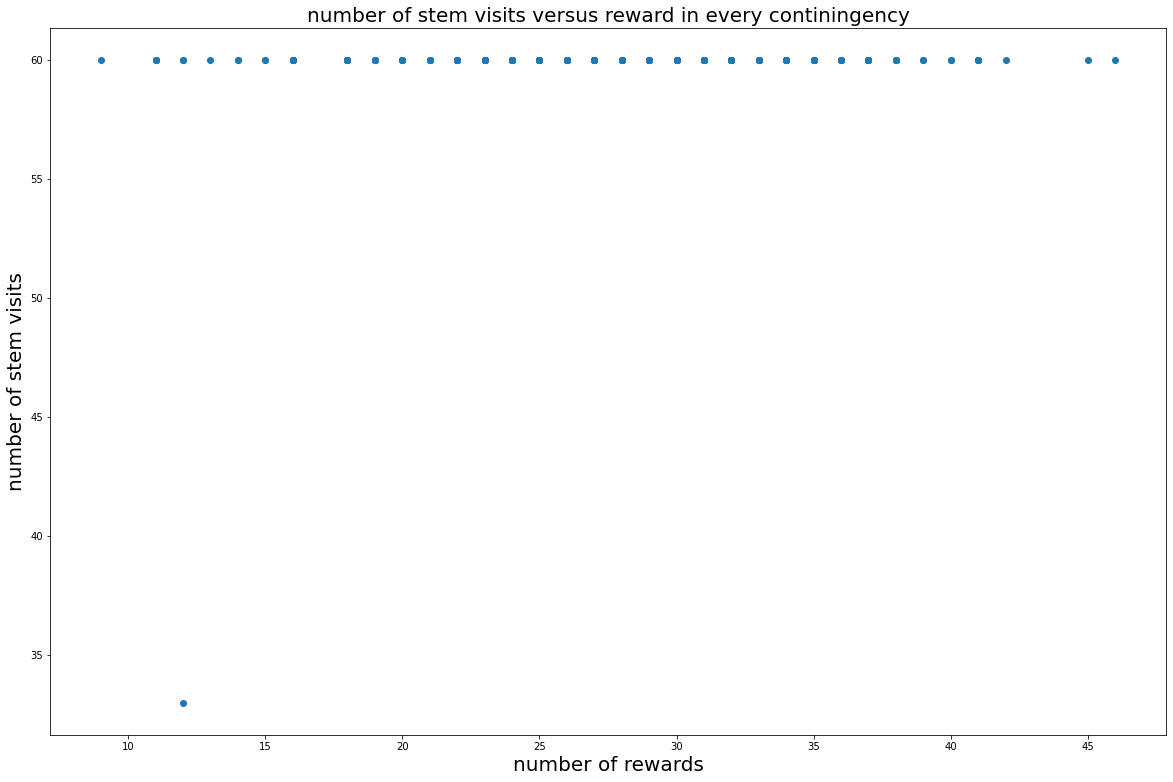

In [96]:
plt.figure(num=None, figsize=(20,13))
plt.scatter(df_num_stems['num_rew'],df_num_stems['stem_num'])
plt.title('number of stem visits versus reward in every continingency',fontsize=20)
plt.xlabel('number of rewards', fontsize=20)
plt.ylabel('number of stem visits',fontsize=20)

In [ ]:
# could do something similar with recent experienced rew prob.. 
#figure out what the rew probability was when rat leaves the stem.


#When the number of stem visits is high, how likely is it that its the first day? first session? 
#first contignecy? When the number of stem visits is low, how likely is it that its a specific 
#rew probability distribution?

In [ ]:
#what is rew rate for every bout? should he have stayed or left? 

#for every bout at a stem, what was avg rew rate? (would expect short bouts with low rew rate)

#firstday_firstsesh = df.loc[0:59]
#firstday_firstsesh.stem_num.ne(firstday_firstsesh['stem_num'].shift())
#num_stems= df.groupby(day_sesh_cont)['stem_num'].nunique()

#firstsesh = df.loc[0:179]
bout_lengths = pd.DataFrame(df['stem_num'].value_counts(ascending=True))
bout_lengths = bout_lengths.sort_index()
bout_lengths
bout_rew_mean= []
day_num= []
cont_num= []
sesh_num = []
for ix in range(1,df.stem_num.max()+1):
    bout_rew_mean.append(df[df.stem_num.eq(ix)]['reward'].mean())
    day_num.append(df[df.stem_num.eq(ix)]['day'].mean())
    sesh_num.append(df[df.stem_num.eq(ix)]['session'].mean())
    cont_num.append(df[df.stem_num.eq(ix)]['cont_num'].mean())
bout_lengths['rew_avg']= bout_rew_mean 
bout_lengths['day_num'] = day_num
bout_lengths['sesh_num'] = sesh_num #just found that these bouts cross contingencies- problem)
bout_lengths['cont_num'] = cont_num #just found that these bouts cross contingencies- problem)

    
    
    
plt.figure(num=None, figsize=(20,10))
scatter = plt.scatter(bout_lengths.stem_num,bout_lengths.rew_avg,c=bout_lengths['day_num'], cmap=plt.cm.binary)
handles, labels = scatter.legend_elements()
#print(labels)
labels = ['day1','day2','day3','day4','day5','day6','day7','day8','day8','day9','day10','day11']
plt.legend(handles, labels)
plt.title('length of bout vs experienced rew prob')
plt.xlabel('length of bout')
plt.ylabel('experienced reward probability')

In [ ]:
first_day_sesh_cont = (bout_lengths[bout_lengths.day_num.eq(1) & bout_lengths.cont_num.eq(1) & bout_lengths.sesh_num.eq(1)])
first_day_sesh_cont 
plt.scatter(first_day_sesh_cont.stem_num,first_day_sesh_cont.rew_avg,c=range(len(first_day_sesh_cont)), cmap=plt.cm.autumn)
labels = ['bout1','bout2','bout3','bout4','bout5','bout6','bout7','bout8','bout8','bout9']
plt.legend(handles, labels)
plt.title('length of bout vs experienced rew prob')
plt.xlabel('length of bout')
plt.ylabel('experienced reward probability')

In [ ]:
firstday_firstcont_bout_legnths = bout_lengths[bout_lengths.day_num.eq(1)][1:60]
#plt.figure(num=None, figsize=(20,10))
plt.scatter(firstday_bout_legnths.stem_num,firstday_bout_legnths.rew_avg)#c=firstday_bout_legnths['day_num'], cmap=plt.cm.autumn)
#handles, labels = scatter.legend_elements()
#print(labels)
#labels = ['day1','day2','day3','day4','day5','day6','day7','day8','day8','day9','day10','day11']
#plt.legend(handles, labels)
plt.title('length of bout vs experienced rew prob-first day')
plt.xlabel('length of bout')
plt.ylabel('experienced reward probability')

In [ ]:
lastday_bout_legnths = bout_lengths[bout_lengths.day_num.eq(11)]
#plt.figure(num=None, figsize=(20,10))
plt.scatter(lastday_bout_legnths.stem_num,lastday_bout_legnths.rew_avg)#c=firstday_bout_legnths['day_num'], cmap=plt.cm.autumn)
#handles, labels = scatter.legend_elements()
#print(labels)
#labels = ['day1','day2','day3','day4','day5','day6','day7','day8','day8','day9','day10','day11']
#plt.legend(handles, labels)
plt.title('length of bout vs experienced rew prob- last day')
plt.xlabel('length of bout')
plt.ylabel('experienced reward probability')

In [ ]:
bout_lengths.stem_num

In [ ]:
bout_lengths

In [119]:
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
#df['contingency'].ne(df['contingency'].shift())

In [118]:
df['stem_switch']

0          1
1          2
2          2
3          3
4          3
        ... 
13288    814
13289    814
13290    814
13291    814
13292    814
Name: stem_switch, Length: 13293, dtype: int64